#KidlearnStarter

In [1]:
import sys
import os
import numpy as np
import seaborn
import time
sys.path.append("../..")
sys.path.append("../../kidlearn_lib/")
%matplotlib inline

#Presentation

The Kidlearn library includes a set of algorithms designed to guide a pedagogical sequence of activities, these algorithms are implemented in the ***seq_manager*** module of the library  [(explained in another notebook)](../Sequence_manager_explanation/Seq_manager_explanation.ipynb). To define the different possible exercises, we use **"R-Table"** which are described in our articles. To test and use these algorithms, we defined student models, implemented in ***student*** module, which have some skills to learn through a didactic sequence managed by an algorithm. 

In this notebook, we will focus on the ***experimentation*** module, which permit to manage different level of simulation. The parameter files are located in the folder **paramas_files/**, and the using R-Tables in **RT/**. 

In [2]:
import kidlearn_lib as k_lib
import graph_lib as graph

#The experimentation objects

We will introduce the different objects involved in ***experimentation*** module. In this notebook we will only use the "$Q$" student model and the "*N1*" R-Table.

##Working session

A *Working session* is defined by a student and a sequence manager. It will permit to manage the activity sequence for the student ***$s$*** with the algorithm **$A$**.

#### Use of a simple example of a configuration

We create a student based on the $Q$ model.

In [3]:
s = k_lib.config.student(params_file="qstud",directory="params_files")

We create a sequence manager, here it's ***RiARiT*** (you can also try ZPDES).

In [6]:
A = k_lib.config.seq_manager(params_file="RIARIT",directory="params_files")
#A = k_lib.config.seq_manager(params_file="ZPDES",directory="params_files")

We create a working session based on the student and the algorithm.

In [7]:
workSession = k_lib.experimentation.WorkingSession(student=s,seq_manager=A)
# same thing if we directly load worksession.json file
# workSession2 = k_lib.experimentation.WorkingSession(params_file="worksession",directory="params_files")

To run one step, you can use the "*step_forward()*" function. 

In [8]:
workSession.step_forward()
# def step_forward(self):
    # ex = self.new_exercise() <- the algorithm choose the activity to do
    # self.student_answer(ex) <- student answer to the activity
    # self.save_actual_step() <- save the activity
    # self.update_manager(ex) <- update to choose the next activity

In [9]:
workSession.actual_step() # what is the last exercise done

act : {u'N1': [2, 1, 0], 'ans': 0}, student skill: [S0 : 0.05, S1 : 0.1, S2 : 0]

***"act"*** presents the parameterization of the activity. *"N1"* is the name of the Table, and the vector "N1 : [0,0,0] " represent the values taken by the 3 didactic parameters. 

***"student skill"*** presents the level of the student ($ \in [0;1]$) for each skill (here : *S0, S1, S2*).

To run a sequence with $n$ activities we will use the *run($n$)* function. 

In [10]:
workSession.run(100) # do 100 times step_forward()

In [11]:
workSession.step[0:10] # shows the first 10 steps

[act : {u'N1': [2, 1, 0], 'ans': 0}, student skill: [S0 : 0.05, S1 : 0.1, S2 : 0],
 act : {u'N1': [2, 0, 0], 'ans': 0}, student skill: [S0 : 0.05, S1 : 0.15, S2 : 0.07],
 act : {u'N1': [0, 1, 1], 'ans': 1}, student skill: [S0 : 0.05, S1 : 0.15, S2 : 0.07],
 act : {u'N1': [0, 0, 1], 'ans': 1}, student skill: [S0 : 0.06, S1 : 0.15, S2 : 0.07],
 act : {u'N1': [0, 1, 1], 'ans': 0}, student skill: [S0 : 0.16, S1 : 0.15, S2 : 0.07],
 act : {u'N1': [0, 1, 1], 'ans': 0}, student skill: [S0 : 0.16, S1 : 0.15, S2 : 0.07],
 act : {u'N1': [2, 1, 0], 'ans': 0}, student skill: [S0 : 0.16, S1 : 0.15, S2 : 0.07],
 act : {u'N1': [2, 0, 0], 'ans': 0}, student skill: [S0 : 0.16, S1 : 0.15, S2 : 0.07],
 act : {u'N1': [0, 0, 1], 'ans': 1}, student skill: [S0 : 0.16, S1 : 0.15, S2 : 0.07],
 act : {u'N1': [0, 0, 0], 'ans': 1}, student skill: [S0 : 0.16, S1 : 0.15, S2 : 0.07]]

##### Use of 3 sequence managers (RiARiT, ZPDES, Random)

In [24]:
wsRiarit = k_lib.experimentation.WorkingSession(params_file="ws_expe_RiARiT")
wsZpdes = k_lib.experimentation.WorkingSession(params_file="ws_expe_ZPDES")
wsRandom = k_lib.experimentation.WorkingSession(params_file="ws_expe_Random")

In [25]:
wsRiarit.run(100)
wsZpdes.run(100)
wsRandom.run(100)

In [26]:
print "Skill level after 100 steps :"
print "Riarit %s " % [wsRiarit.step[-1].student["knowledges"][i].level for i in range(len(wsRiarit.KC))]
print "ZPDES : %s" % [wsZpdes.step[-1].student["knowledges"][i].level for i in range(len(wsZpdes.KC))]
print "Random : %s"  % [wsRandom.step[-1].student["knowledges"][i].level for i in range(len(wsRandom.KC))]

Skill level after 100 steps :
Riarit [0.8, 0.7, 0.4, 0.42, 0.2, 0.2, 0.48999999999999994] 
ZPDES : [1.0, 0.5, 0.4, 0.7, 0.4, 0.2, 0.294]
Random : [0.8, 0.7, 0.4, 0.42, 0, 0.35, 0]


##Experiment
The goal of the *Experiment* object is to give a tool to follow and analyze data from a  population of students using different sequences managers, for example to compare ***RiARiT***, ***ZPDES*** with a random or predefined sequence. 

In [27]:
xp = k_lib.experimentation.Experiment(params_file="experiment_expe")

In [28]:
xp.run(200)

Sequence
ZpdesHssbg
RandomSequence
RiaritHssbg


In [ ]:
for seq_name,group in xp._groups.items():

        data = group[0].get_ex_repartition_time(100)
        show = 1 # graphs are saved in "path", replace show = 0 to not see the graph, 
        graph.kGraph.plot_cluster_lvl_sub([data],100,100, title = "%s \nStudent distribution per erxercices type over time" % (seq_name),path = "experiments/graphics/", ref = "clust_xseq_global_%s" % (seq_name),legend = ["M1","M2","M3","M4","M5","M6","R1","R2","R3","R4","MM1","MM2","MM3","MM4","RM1","RM2","RM3","RM4"],dataToUse = range(len([data])), show=show)


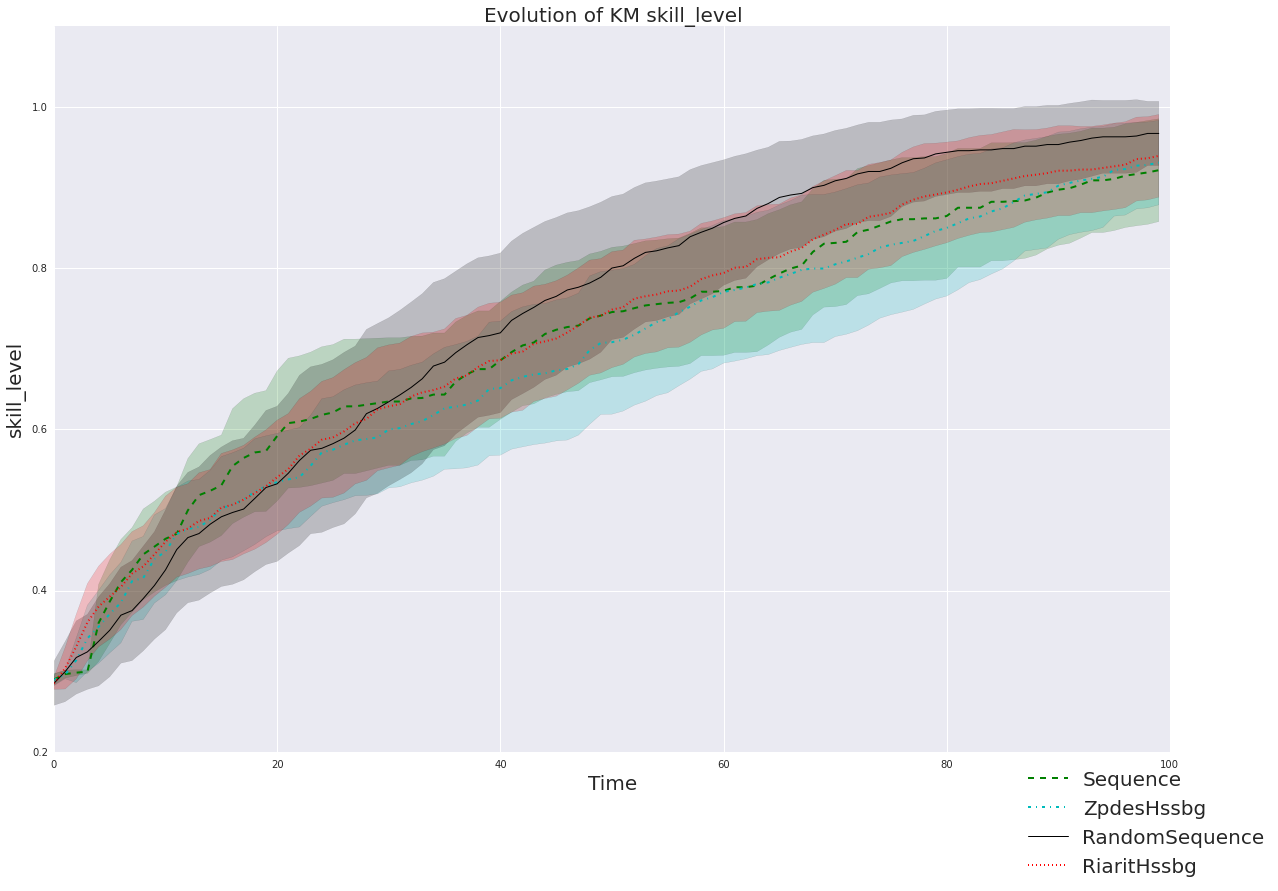

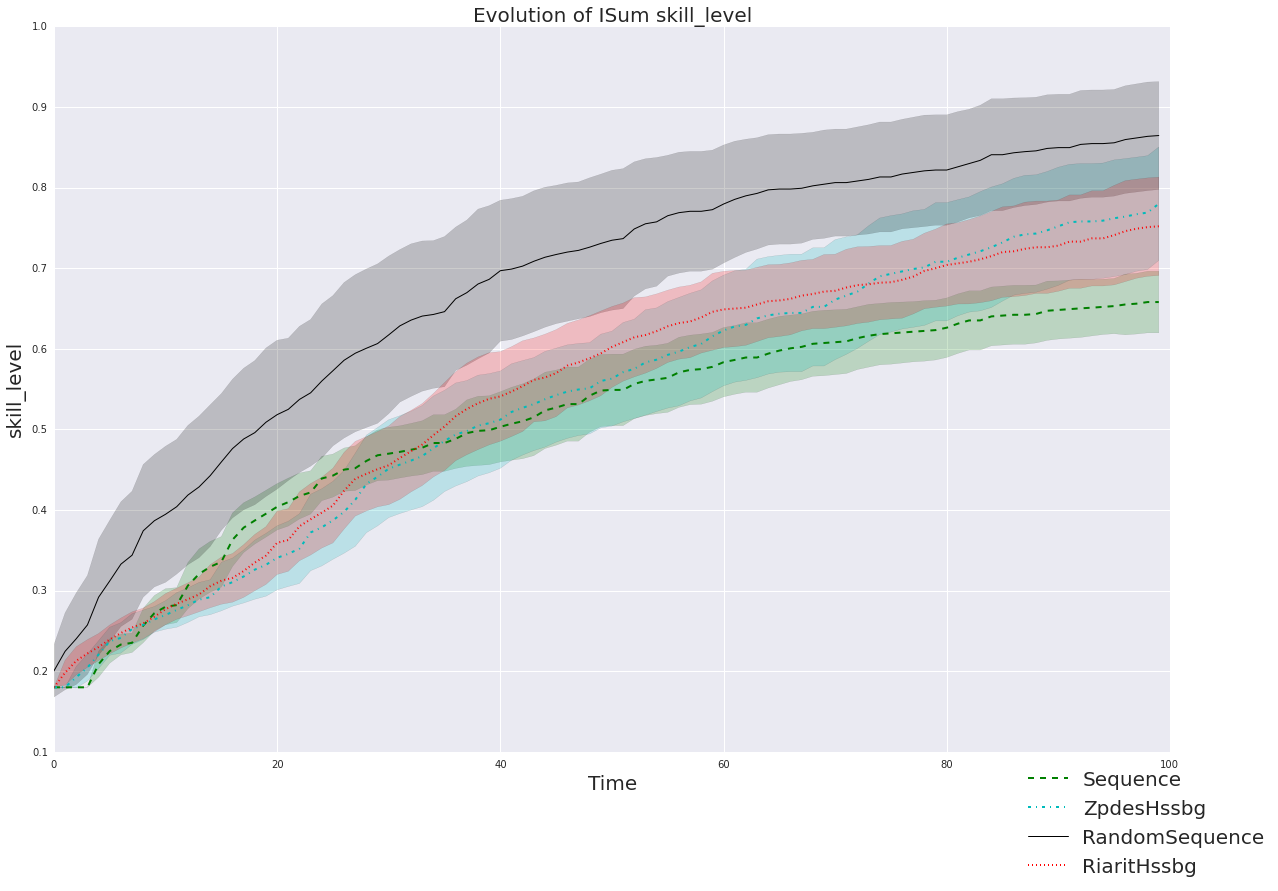

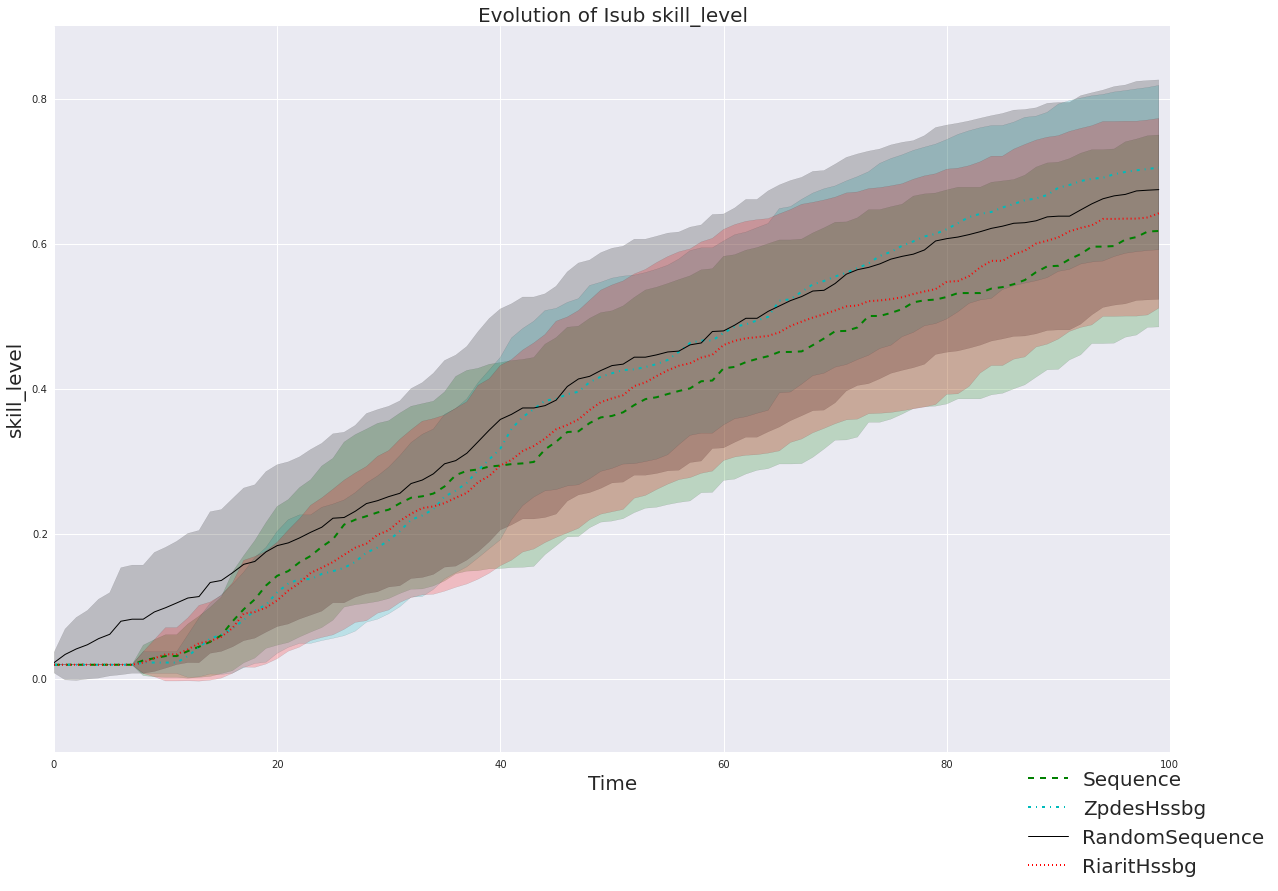

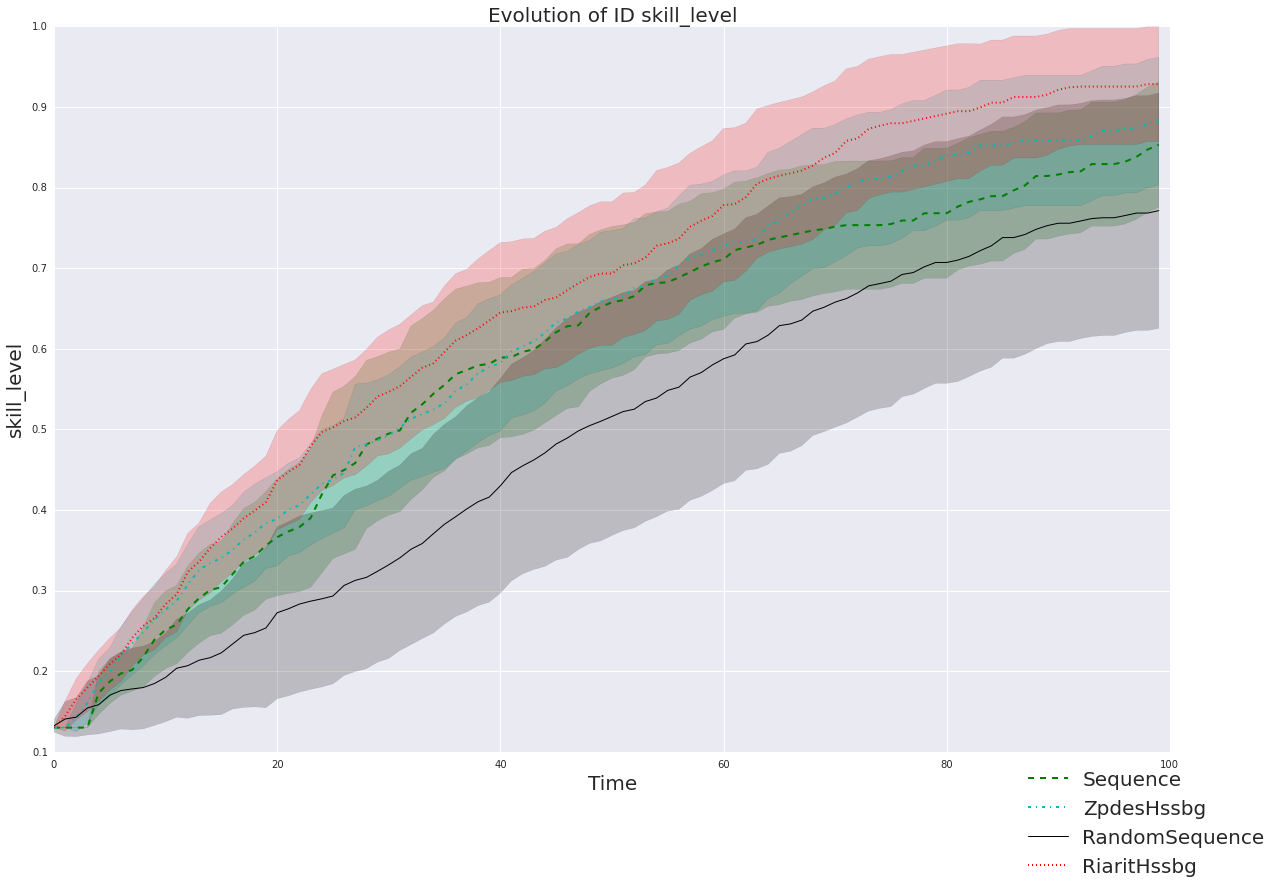

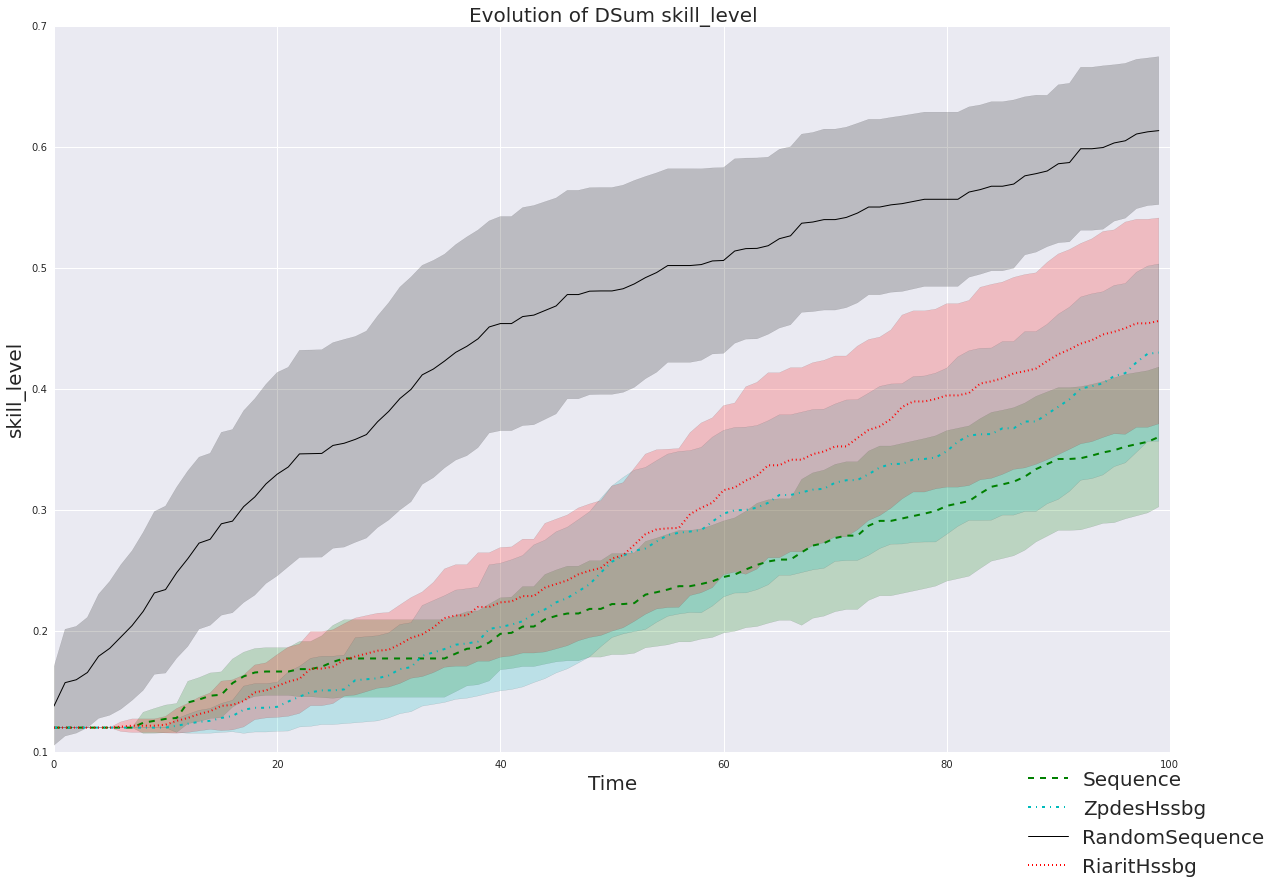

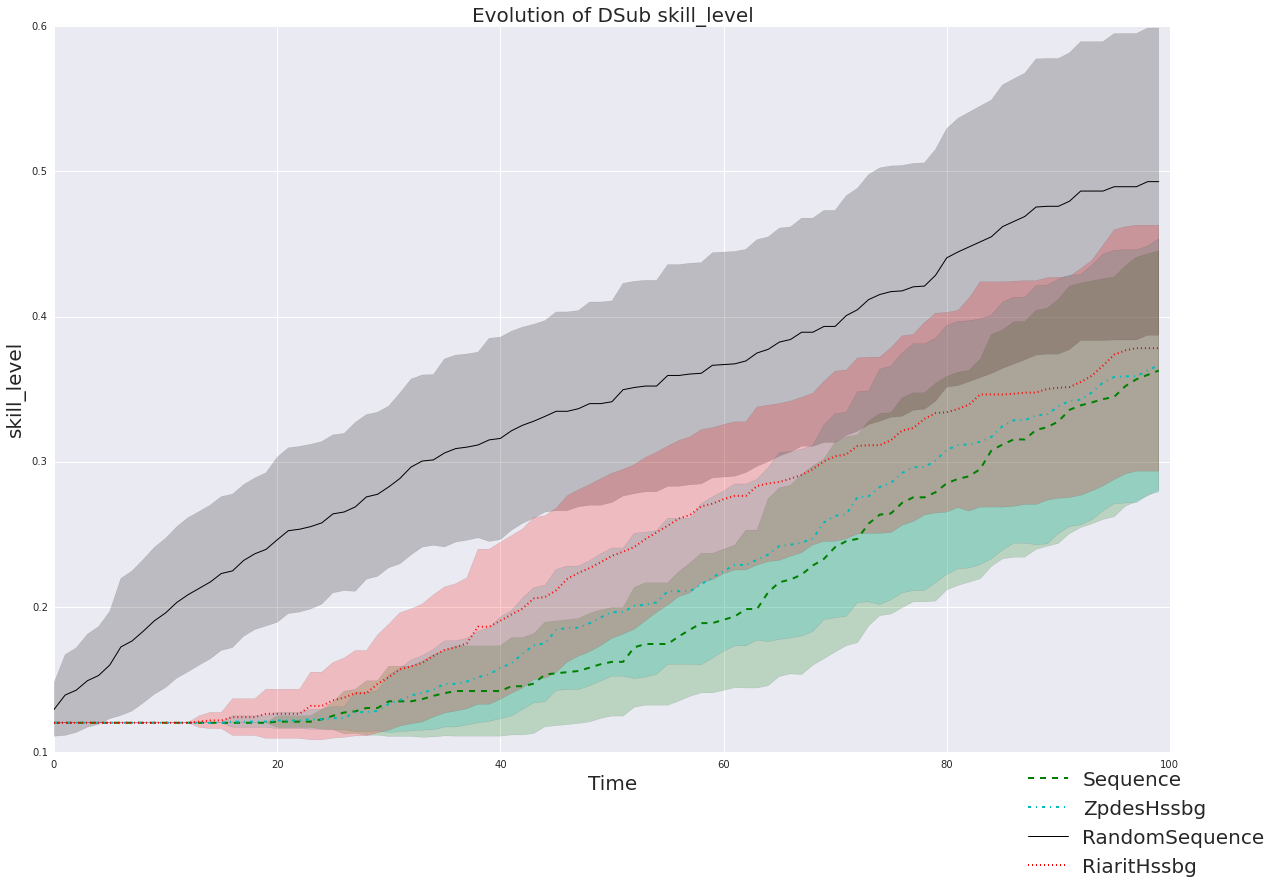

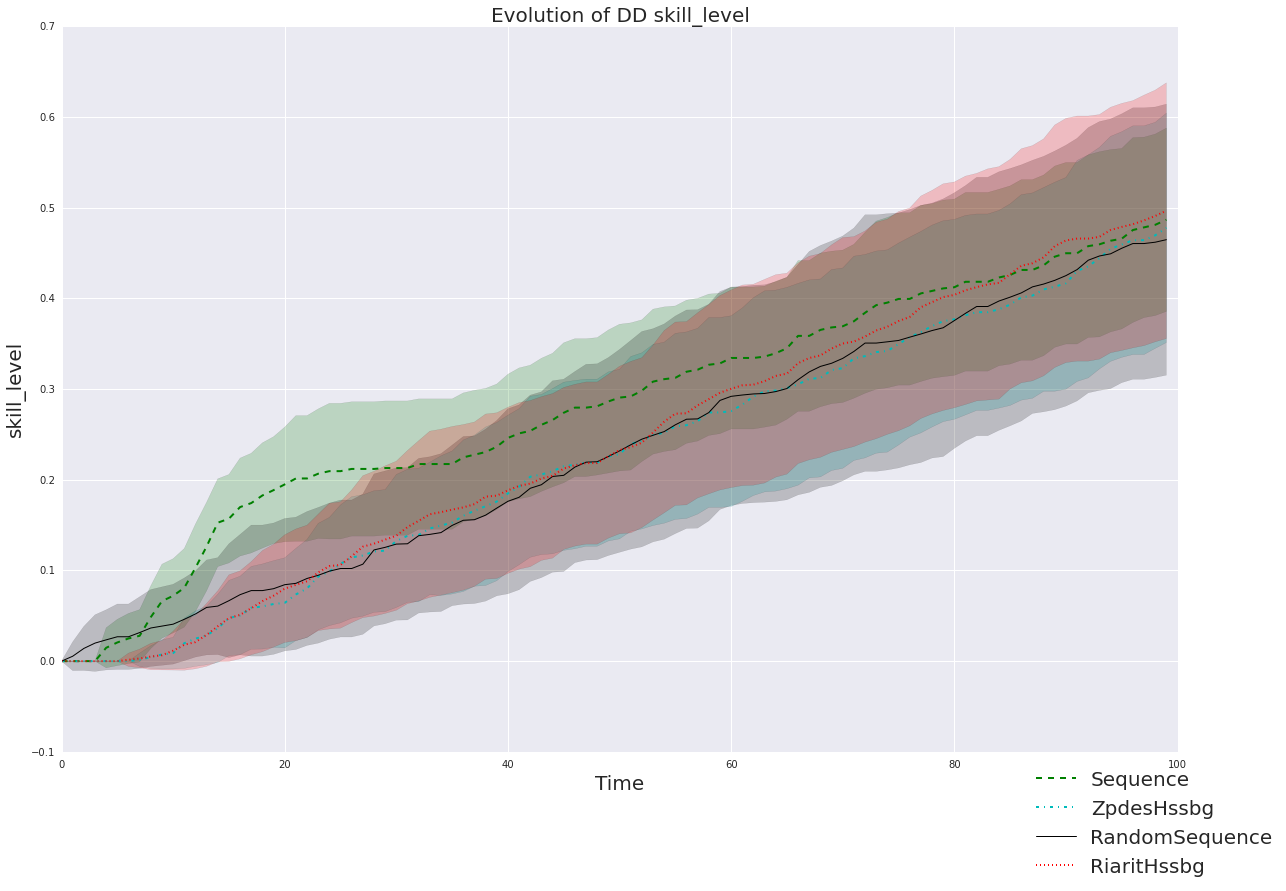

In [34]:
reload(graph)
seaborn.set_style("darkgrid")
skill_labels = ["KM","ISum","Isub","ID","DSum","DSub","DD"]
for k in range(len(skill_labels)):
    mean_data = []
    std_data = []
    for seq_name,group in xp._groups.items():

            data = [group[0].get_students_level(time = x, kc = k) for x in range(100)]
            mean_data.append([np.mean(data[x]) for x in range(len(data))])
            std_data.append([np.std(data[x]) for x in range(len(data))])

    graph.kGraph.draw_curve([mean_data], labels = [xp._groups.keys()], nb_ex = len(data), typeData = "skill_level", type_data_spe = skill_labels[k] ,ref = skill_labels[k], markers = None, colors = [["green","#00BBBB","black",'#FF0000'],["green","#00BBBB","black",'#FF0000']], line_type = ['dashed','dashdot','solid',"dotted"], legend_position = 3, std_data = [std_data])
